# ATML19 Group6 Project Report
# Book Covers

In the scope of this project, we explore two tasks:

* Predicting a book's genre based on its cover.
* Generating book covers for a given genre.

A pretrained model, a dataset with the cover links and a selection of sample covers can be found [here](https://drive.google.com/drive/folders/1yoCxZrAMft0ifL6Imt3CRpUejWQZYO_C?usp=sharing).

Our dataset is based on the dataset compiled by:
* B. K. Iwana, S. T. Raza Rizvi, S. Ahmed, A. Dengel, and S. Uchida, **Judging a Book by its Cover**, arXiv (2016). (https://github.com/uchidalab/book-dataset)


## Downloading the covers
On the above linked drive only a sample set of covers can be found. However, we provide a script to download all covers from Amazon.

1. Download the prepared dataset (json file) from the drive.
1. Run the cell below.

In [1]:
from utils.fetch_image import download_covers

json_file = 'data/processed/books_200000.json'
covers_save_dir = 'data/covers/coversraw'
log_dir = 'data/covers'

download_covers(json_file, covers_save_dir, log_dir, verbose=False)

Done


The covers will be converted to JPEGs while downloading. There is also a facility in place to convert already downloaded 
images to the JPEG-format.

In [6]:
from utils.convert_images import convert_to_jpeg
covers_save_dir = 'data/covers/coversraw'

convert_to_jpeg(covers_save_dir, verbose=False)

Done


Now the cover images have to be moved in folders accoring to their genre.

In [ ]:
from utils.split_dataset import create_image_folders

covers_extension = '.jpeg'
covers_src_dir = 'data/covers/coversraw/'
covers_target_dir = '../data/covers/'
json_file = 'data/processed/books_200000.json'
test_split = .1
val_split = .1

create_image_folders(json_file, covers_src_dir, covers_target_dir, test_split, val_split)

# Classification

In [ ]:
from utils_print import *

In [2]:
savedir_alex1 = 'parameters/alex_1/'
dataset_alex_name = 'alexnet'

savedir_alexNorm = 'parameters/alex_normalized/'

savedir_dense1 = 'parameters/dense_1/'
dataset_dense_name = 'densenet'



Top 1 accuracy: alexnet:21.6096, alexnet normalized:23.9437, densenet:28.5526
Top 3 accuracy: alexnet:39.2375, alexnet normalized:42.2076, densenet:48.6908


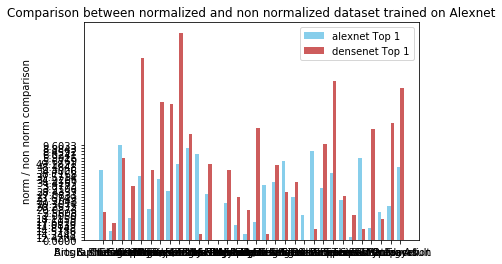

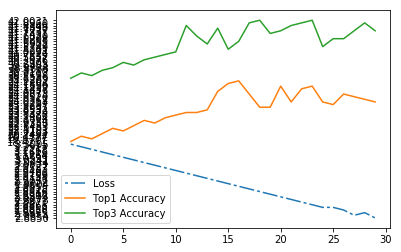

In [3]:
alexData1 = load_per_label(savedir_alex1, dataset_alex_name, 'test')
alexTop1, alexTop3 = load_acc(savedir_alex1, dataset_alex_name, 'test')
alexLearning = load_learning(savedir_alex1, dataset_alex_name, 'validation')

alexNorm = load_per_label(savedir_alexNorm, dataset_alex_name, 'test')
alexNormTop1, alexNormTop3 = load_acc(savedir_alexNorm, dataset_alex_name, 'test')
alexNormLearning = load_learning(savedir_alexNorm, dataset_alex_name, 'validation')

denseData1 = load_per_label(savedir_dense1, dataset_dense_name, 'test')
denseTop1, denseTop3 = load_acc(savedir_dense1, dataset_dense_name, 'test')

print('Top 1 accuracy: alexnet:' + alexTop1 + ', alexnet normalized:' + alexNormTop1 + ', densenet:' + denseTop1)
print('Top 3 accuracy: alexnet:' + alexTop3 + ', alexnet normalized:' + alexNormTop3 + ', densenet:' + denseTop3)

plot(alexData1[:,0],alexData1[:,1], 'alexnet Top 1' ,denseData1[:,1], 'densenet Top 1')

plot_learning(alexNormLearning)
